In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
df_train=pd.read_csv("train_fwYjLYX.csv")

In [224]:
df_train.shape

(80402, 6)

In [225]:
df_train.isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

In [226]:
df_train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [227]:
df_train['segment'].unique()

array([1, 2], dtype=int64)

In [228]:
df_train['branch_id'].unique()

array([  1.,   3.,   5.,   7.,   8.,   9.,  10.,  11.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  29.,  34.,  35.,  36.,  42.,
        43.,  48.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  72.,  73.,  74.,  76.,  77.,  78.,  79.,  82.,  84.,  85.,
       100., 101., 103., 104., 105., 111., 117., 120., 121., 135., 136.,
       137., 147., 159., 165., 202., 207., 217., 248., 249., 250., 251.,
       254., 255., 257., 258., 259., 260., 261., 262., 263., 264., 265.,
       266., 267., 268., 269., 270., 271.,  nan])

In [229]:
df_train['state'].unique()

array(['WEST BENGAL', 'DELHI', 'KARNATAKA', 'TAMIL NADU', 'UTTAR PRADESH',
       'PUNJAB', 'TELANGANA', 'ANDHRA PRADESH', 'MAHARASHTRA', 'ORISSA',
       'GUJARAT', 'ASSAM', 'JHARKHAND', 'UTTARAKHAND', 'KERALA',
       'CHHATTISGARH', 'BIHAR', 'TRIPURA', 'MADHYA PRADESH', 'HARYANA'],
      dtype=object)

In [230]:
df_train['zone'].unique()

array(['EAST', 'NORTH', 'SOUTH', 'WEST', 'CENTRAL', nan], dtype=object)

In [231]:
#np.arange(str(df_train['application_date']))

In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [255]:
#filling null value in Zone
col_temp=df_train[['state','zone']]
print(col_temp.shape)
zone_nnul=df_train.dropna()
#zone_nul=col_temp.append(lambda a: a for a['zone'].isnull())
print(zone_nnul.shape)
#print(zone_nul.shape)

(80402, 2)
(66898, 6)


In [234]:
s=zone_nnul[['state','zone']].groupby('state')
s.describe()

zone                       
                count unique      top   freq
state                                       
ANDHRA PRADESH   4836      1    SOUTH   4836
ASSAM            3224      1     EAST   3224
BIHAR            2418      1     EAST   2418
CHHATTISGARH      806      1  CENTRAL    806
DELHI             806      1    NORTH    806
GUJARAT          6448      1     WEST   6448
HARYANA          3224      1    NORTH   3224
JHARKHAND        1612      1    SOUTH   1612
KARNATAKA        2418      1    SOUTH   2418
KERALA            806      1    SOUTH    806
MADHYA PRADESH    806      1  CENTRAL    806
MAHARASHTRA     10478      1     WEST  10478
ORISSA           2418      2    SOUTH   1612
PUNJAB           4030      1    NORTH   4030
TAMIL NADU       5642      1    SOUTH   5642
TELANGANA        1612      1    SOUTH   1612
TRIPURA          1612      1     EAST   1612
UTTAR PRADESH    5642      1     EAST   5642
UTTARAKHAND      1612      1     EAST   1612
WEST BENGAL      6448      1     EAST   6448

In [235]:
uniq_state_zone=pd.DataFrame(columns=('state','zone'))

In [236]:
type(uniq_state_zone)
uniq_state_zone.head()

,state,zone


In [237]:
#state_un=pd.DataFrame(df_train['state'].unique())
#print(state_un)
state_un=df_train['state'].unique()
print(type(state_un))
print(state_un)

<class 'numpy.ndarray'>
['WEST BENGAL' 'DELHI' 'KARNATAKA' 'TAMIL NADU' 'UTTAR PRADESH' 'PUNJAB'
 'TELANGANA' 'ANDHRA PRADESH' 'MAHARASHTRA' 'ORISSA' 'GUJARAT' 'ASSAM'
 'JHARKHAND' 'UTTARAKHAND' 'KERALA' 'CHHATTISGARH' 'BIHAR' 'TRIPURA'
 'MADHYA PRADESH' 'HARYANA']


In [238]:
uniq_state_zone['state']=pd.Series(state_un)
print(uniq_state_zone)

             state zone
0      WEST BENGAL  NaN
1            DELHI  NaN
2        KARNATAKA  NaN
3       TAMIL NADU  NaN
4    UTTAR PRADESH  NaN
5           PUNJAB  NaN
6        TELANGANA  NaN
7   ANDHRA PRADESH  NaN
8      MAHARASHTRA  NaN
9           ORISSA  NaN
10         GUJARAT  NaN
11           ASSAM  NaN
12       JHARKHAND  NaN
13     UTTARAKHAND  NaN
14          KERALA  NaN
15    CHHATTISGARH  NaN
16           BIHAR  NaN
17         TRIPURA  NaN
18  MADHYA PRADESH  NaN
19         HARYANA  NaN


In [239]:
print(df_train['state'])

0        WEST BENGAL
1        WEST BENGAL
2        WEST BENGAL
3        WEST BENGAL
4        WEST BENGAL
            ...     
80397    WEST BENGAL
80398    WEST BENGAL
80399    WEST BENGAL
80400    WEST BENGAL
80401    WEST BENGAL
Name: state, Length: 80402, dtype: object


In [256]:
or_data=zone_nnul.loc[zone_nnul['state']=='ORISSA']

In [277]:
print(or_data['zone'].unique())
print(or_data['branch_id'].unique())

['SOUTH' 'EAST']
[ 20.  48. 165.]


In [278]:
print(or_data['branch_id'].loc[or_data['zone']=='SOUTH'].unique())
print(or_data['branch_id'].loc[or_data['zone']=='EAST'].unique())

[20. 48.]
[165.]


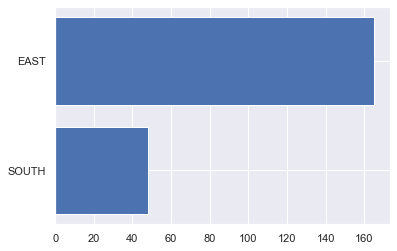

In [561]:
plt.barh(or_data['zone'],or_data['branch_id'])
plt.show()

In [275]:
for i in 0:(len(df_train)-1):
        if (df_train.loc[i,'zone'] in 


state_or=df_train.loc['state'=='ORISSA']

array([165.])

In [357]:
zone_nnul[['state','zone']].loc[zone_nnul['state'].unique()]

KeyError: "None of [Index(['WEST BENGAL', 'DELHI', 'KARNATAKA', 'TAMIL NADU', 'UTTAR PRADESH',\n       'PUNJAB', 'TELANGANA', 'ANDHRA PRADESH', 'MAHARASHTRA', 'ORISSA',\n       'GUJARAT', 'ASSAM', 'JHARKHAND', 'UTTARAKHAND', 'KERALA',\n       'CHHATTISGARH', 'BIHAR', 'TRIPURA', 'MADHYA PRADESH', 'HARYANA'],\n      dtype='object')] are in the [index]"

In [358]:
zone_nnul[['state','zone']]

,state,zone
0,WEST BENGAL,EAST
1,WEST BENGAL,EAST
2,WEST BENGAL,EAST
3,WEST BENGAL,EAST
4,WEST BENGAL,EAST
...,...,...
66893,HARYANA,NORTH
66894,HARYANA,NORTH
66895,HARYANA,NORTH
66896,HARYANA,NORTH


In [305]:
grou_un=zone_nnul.drop_duplicates(subset=['branch_id','state','zone'])

In [306]:
print(grou_un)

      application_date  segment  branch_id           state   zone  case_count
0           2017-04-01        1        1.0     WEST BENGAL   EAST        40.0
806         2017-04-01        1        3.0           DELHI  NORTH        58.0
1612        2017-04-01        1        5.0       KARNATAKA  SOUTH        10.0
2418        2017-04-01        1        7.0     WEST BENGAL   EAST         2.0
3224        2017-04-01        1        8.0     WEST BENGAL   EAST        13.0
...                ...      ...        ...             ...    ...         ...
62868       2017-04-01        1      267.0  ANDHRA PRADESH  SOUTH         0.0
63674       2017-04-01        1      268.0   UTTAR PRADESH   EAST         0.0
64480       2017-04-01        1      269.0   UTTAR PRADESH   EAST         0.0
65286       2017-04-01        1      270.0   UTTAR PRADESH   EAST         0.0
66092       2017-04-01        1      271.0         HARYANA  NORTH         0.0

[83 rows x 6 columns]


In [307]:
grou_un=grou_un.drop(['branch_id','application_date','segment','case_count'],axis=1)

In [308]:
print(grou_un)

                state   zone
0         WEST BENGAL   EAST
806             DELHI  NORTH
1612        KARNATAKA  SOUTH
2418      WEST BENGAL   EAST
3224      WEST BENGAL   EAST
...               ...    ...
62868  ANDHRA PRADESH  SOUTH
63674   UTTAR PRADESH   EAST
64480   UTTAR PRADESH   EAST
65286   UTTAR PRADESH   EAST
66092         HARYANA  NORTH

[83 rows x 2 columns]


In [309]:
grou_un=grou_un.drop_duplicates()

In [313]:
print(grou_un)

                state     zone
0         WEST BENGAL     EAST
806             DELHI    NORTH
1612        KARNATAKA    SOUTH
6448       TAMIL NADU    SOUTH
7254    UTTAR PRADESH     EAST
8060           PUNJAB    NORTH
8866        TELANGANA    SOUTH
9672   ANDHRA PRADESH    SOUTH
10478     MAHARASHTRA     WEST
12090          ORISSA    SOUTH
14508         GUJARAT     WEST
16120           ASSAM     EAST
20956       JHARKHAND    SOUTH
32240     UTTARAKHAND     EAST
33046          KERALA    SOUTH
33852    CHHATTISGARH  CENTRAL
37076           BIHAR     EAST
41106         TRIPURA     EAST
45136  MADHYA PRADESH  CENTRAL
46748          ORISSA     EAST
55614         HARYANA    NORTH


In [314]:
grou_un.count()

state    21
zone     21
dtype: int64

In [415]:
df_train_null=df_train.loc[df_train['zone'].isnull(),:]

In [416]:
df_train_null.shape
df_train_null.info()
len(df_train_null)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13504 entries, 66898 to 80401
Data columns (total 6 columns):
application_date    13504 non-null object
segment             13504 non-null int64
branch_id           0 non-null float64
state               13504 non-null object
zone                0 non-null object
case_count          13504 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 738.5+ KB


13504

In [424]:
for i in range(0,len(df_train_null),1):
        val=df_train_null.iloc[i,3]
        for j in range(0,len(grou_un),1):
            if(grou_un.iloc[j,0]==val):
                df_train_null.iloc[i,4]=grou_un.iloc[j,1]



#df_train_null['zone']=grou_un[]

In [425]:
df_train_null.iloc[0,0]

'2017-04-01'

In [426]:
grou_un.iloc[0,1]

'EAST'

In [427]:
df_train_null.head()

,application_date,segment,branch_id,state,zone,case_count
66898,2017-04-01,2,NaN,ASSAM,EAST,0.0
66899,2017-04-02,2,NaN,ASSAM,EAST,0.0
66900,2017-04-03,2,NaN,ASSAM,EAST,0.0
66901,2017-04-04,2,NaN,ASSAM,EAST,0.0
66902,2017-04-05,2,NaN,ASSAM,EAST,0.0


In [428]:
df_train_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13504 entries, 66898 to 80401
Data columns (total 6 columns):
application_date    13504 non-null object
segment             13504 non-null int64
branch_id           0 non-null float64
state               13504 non-null object
zone                13504 non-null object
case_count          13504 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.3+ MB


In [429]:
check=df_train_null.loc[df_train_null['zone'].isnull(),:]

In [430]:
print(check)

Empty DataFrame
Columns: [application_date, segment, branch_id, state, zone, case_count]
Index: []


In [431]:
print(grou_un)

                state     zone
0         WEST BENGAL     EAST
806             DELHI    NORTH
1612        KARNATAKA    SOUTH
6448       TAMIL NADU    SOUTH
7254    UTTAR PRADESH     EAST
8060           PUNJAB    NORTH
8866        TELANGANA    SOUTH
9672   ANDHRA PRADESH    SOUTH
10478     MAHARASHTRA     WEST
12090          ORISSA    SOUTH
14508         GUJARAT     WEST
16120           ASSAM     EAST
20956       JHARKHAND    SOUTH
32240     UTTARAKHAND     EAST
33046          KERALA    SOUTH
33852    CHHATTISGARH  CENTRAL
37076           BIHAR     EAST
41106         TRIPURA     EAST
45136  MADHYA PRADESH  CENTRAL
46748          ORISSA     EAST
55614         HARYANA    NORTH


In [445]:
for i in grou_un['state']:
    print(i)
    print(df_train.groupby[grou_un[i]][['branch_id']].unique())

WEST BENGAL


KeyError: 'WEST BENGAL'

In [456]:
df_over=pd.concat([zone_nnul,df_train_null])

In [457]:
df_over.shape

(80402, 6)

In [459]:
df_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                80402 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.3+ MB


In [468]:
print(zone_nnul.loc[(zone_nnul['state']=='ORISSA') & (zone_nnul['segment']==1)])

      application_date  segment  branch_id   state   zone  case_count
12090       2017-04-01        1       20.0  ORISSA  SOUTH         8.0
12091       2017-04-03        1       20.0  ORISSA  SOUTH         1.0
12092       2017-04-04        1       20.0  ORISSA  SOUTH         0.0
12093       2017-04-05        1       20.0  ORISSA  SOUTH        47.0
12094       2017-04-07        1       20.0  ORISSA  SOUTH        48.0
...                ...      ...        ...     ...    ...         ...
47549       2019-07-01        1      165.0  ORISSA   EAST        15.0
47550       2019-07-02        1      165.0  ORISSA   EAST        10.0
47551       2019-07-03        1      165.0  ORISSA   EAST        25.0
47552       2019-07-04        1      165.0  ORISSA   EAST        18.0
47553       2019-07-05        1      165.0  ORISSA   EAST         0.0

[2418 rows x 6 columns]


In [469]:
print(zone_nnul.loc[(zone_nnul['state']=='ORISSA') & (zone_nnul['segment']==2)])

Empty DataFrame
Columns: [application_date, segment, branch_id, state, zone, case_count]
Index: []


In [470]:
df_seg_1=df_train.loc[df_train['segment']==1]

In [471]:
df_seg_2=df_train.loc[df_train['segment']==2]

In [472]:
df_seg_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66898 entries, 0 to 66897
Data columns (total 6 columns):
application_date    66898 non-null object
segment             66898 non-null int64
branch_id           66898 non-null float64
state               66898 non-null object
zone                66898 non-null object
case_count          66898 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.6+ MB


In [473]:
df_seg_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13504 entries, 66898 to 80401
Data columns (total 6 columns):
application_date    13504 non-null object
segment             13504 non-null int64
branch_id           0 non-null float64
state               13504 non-null object
zone                0 non-null object
case_count          13504 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 738.5+ KB


In [475]:
df_tr_seg_2=df_seg_2[['application_date','state','case_count']]

In [481]:
df_tr_seg_2

,application_date,state,case_count
66898,2017-04-01,ASSAM,0.0
66899,2017-04-02,ASSAM,0.0
66900,2017-04-03,ASSAM,0.0
66901,2017-04-04,ASSAM,0.0
66902,2017-04-05,ASSAM,0.0
...,...,...,...
80397,2019-07-19,WEST BENGAL,1886.0
80398,2019-07-20,WEST BENGAL,1480.0
80399,2019-07-21,WEST BENGAL,1028.0
80400,2019-07-22,WEST BENGAL,1946.0


In [535]:
df_tr_seg_2.loc[df_tr_seg_2['state']=='WEST BENGAL']

,state,case_count
application_date,,
2017-04-01,WEST BENGAL,43.0
2017-04-02,WEST BENGAL,116.0
2017-04-03,WEST BENGAL,178.0
2017-04-04,WEST BENGAL,323.0
2017-04-05,WEST BENGAL,443.0
...,...,...
2019-07-19,WEST BENGAL,1886.0
2019-07-20,WEST BENGAL,1480.0
2019-07-21,WEST BENGAL,1028.0


In [488]:
#df_tr_seg_2_mod=df_tr_seg_2.set_index('application_date',inplace=True)

In [500]:
print(df_tr_seg_2['state'].unique())
len(df_tr_seg_2['state'].unique())
type(df_tr_seg_2['state'].unique())

['ASSAM' 'BIHAR' 'CHHATTISGARH' 'GUJARAT' 'HARYANA' 'JHARKHAND' 'KERALA'
 'KARNATAKA' 'MAHARASHTRA' 'MADHYA PRADESH' 'ORISSA' 'PUNJAB' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'WEST BENGAL']


numpy.ndarray

In [501]:
state_2=df_tr_seg_2['state'].unique()

In [612]:
state_2[15]
len(state_2)
df_tr_seg_2['application_date'].unique()

KeyError: 'application_date'

In [526]:
df_tmp_seg_2=df_tr_seg_2.loc[df_tr_seg_2['application_date']=='KARNATAKA']

KeyError: 'application_date'

In [528]:
#print(type(df_temp))
for i in range(0,len(state_2),1):
    #print(state_2[i])
    df_temp=df_tr_seg_2.loc[df_tr_seg_2['state']==state_2[i]]
    print(df_temp)
    df_tmp_seg_2.append(df_temp[['application_date','case_count']])
    df_tmp_seg_2.rename(columns={'case_count':state_2[i]})
    

                  state  case_count
application_date                   
2017-04-01        ASSAM         0.0
2017-04-02        ASSAM         0.0
2017-04-03        ASSAM         0.0
2017-04-04        ASSAM         0.0
2017-04-05        ASSAM         0.0
...                 ...         ...
2019-07-19        ASSAM      1383.0
2019-07-20        ASSAM       986.0
2019-07-21        ASSAM       295.0
2019-07-22        ASSAM      1204.0
2019-07-23        ASSAM      1254.0

[844 rows x 2 columns]


KeyError: "['application_date'] not in index"

In [ ]:
df_tr_seg_2['state'].unique()

In [529]:
df_temp[['application_date','case_count']]

KeyError: "['application_date'] not in index"

In [593]:
#df_tr_seg_2['application_date']=pd.to_datetime(df_tr_seg_2['application_date'])
df_tr_seg_2['application_date']=df_tr_seg_2['application_date'].astype('datetime64[ns]')
df_tr_seg_2.pivot_table('case_count',index='application_date',columns='state')

KeyError: "None of [Index(['application_date'], dtype='object')] are in the [columns]"

In [599]:
piv0_df_seg_2=df_tr_seg_2.pivot_table('case_count',index='application_date',columns='state')

In [600]:
pivo_df_seg_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844 entries, 2017-04-01 to 2019-07-23
Data columns (total 16 columns):
ASSAM             844 non-null float64
BIHAR             844 non-null float64
CHHATTISGARH      844 non-null float64
GUJARAT           844 non-null float64
HARYANA           844 non-null float64
JHARKHAND         844 non-null float64
KARNATAKA         844 non-null float64
KERALA            844 non-null float64
MADHYA PRADESH    844 non-null float64
MAHARASHTRA       844 non-null float64
ORISSA            844 non-null float64
PUNJAB            844 non-null float64
TAMIL NADU        844 non-null float64
TRIPURA           844 non-null float64
UTTAR PRADESH     844 non-null float64
WEST BENGAL       844 non-null float64
dtypes: float64(16)
memory usage: 152.1+ KB


In [579]:
import seaborn as sns; sns.set()
index_date = pd.date_range(start = '2018-01-01', end = '2018-12-31')

In [602]:
pi_test=df_tr_seg_2
pivo_df_seg_2

state,ASSAM,BIHAR,CHHATTISGARH,GUJARAT,HARYANA,JHARKHAND,KARNATAKA,KERALA,MADHYA PRADESH,MAHARASHTRA,ORISSA,PUNJAB,TAMIL NADU,TRIPURA,UTTAR PRADESH,WEST BENGAL
application_date,,,,,,,,,,,,,,,,
2017-04-01,0.0,0.0,34.0,0.0,0.0,0.0,165.0,23.0,36.0,0.0,111.0,0.0,458.0,0.0,27.0,43.0
2017-04-02,0.0,0.0,37.0,5.0,0.0,0.0,89.0,6.0,0.0,0.0,148.0,0.0,182.0,0.0,22.0,116.0
2017-04-03,0.0,0.0,45.0,9.0,0.0,0.0,203.0,152.0,28.0,0.0,233.0,0.0,1161.0,0.0,7.0,178.0
2017-04-04,0.0,0.0,109.0,7.0,0.0,0.0,398.0,146.0,85.0,0.0,276.0,0.0,881.0,0.0,20.0,323.0
2017-04-05,0.0,0.0,97.0,44.0,0.0,0.0,250.0,173.0,0.0,0.0,227.0,0.0,1142.0,0.0,39.0,443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19,1383.0,6285.0,493.0,566.0,0.0,459.0,3930.0,1457.0,1588.0,459.0,1481.0,0.0,9046.0,124.0,621.0,1886.0
2019-07-20,986.0,5686.0,372.0,495.0,0.0,340.0,3454.0,1208.0,1346.0,558.0,1112.0,0.0,8516.0,108.0,462.0,1480.0
2019-07-21,295.0,2982.0,231.0,20.0,0.0,124.0,1622.0,115.0,456.0,254.0,787.0,0.0,3862.0,32.0,459.0,1028.0


In [595]:
pivo_df_seg_2.iloc[:,0]

application_date
2017-04-01       0.0
2017-04-02       0.0
2017-04-03       0.0
2017-04-04       0.0
2017-04-05       0.0
               ...  
2019-07-19    1383.0
2019-07-20     986.0
2019-07-21     295.0
2019-07-22    1204.0
2019-07-23    1254.0
Name: ASSAM, Length: 844, dtype: float64

In [596]:
pivo_df_seg_2[[index_date],['ASSAM']].plot(figsize=(30,20), linewidth=1, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Case Count', fontsize=20);

TypeError: '([DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')], ['ASSAM'])' is an invalid key

In [622]:
pivo_df_seg_2.loc[index_date],['ASSAM']

KeyError: "None of [DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',\n               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',\n               '2018-01-09', '2018-01-10',\n               ...\n               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',\n               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',\n               '2018-12-30', '2018-12-31'],\n              dtype='datetime64[ns]', length=365, freq='D')] are in the [index]"

In [598]:
type(pivo_df_seg_2.index) == pd.tseries.index.DatetimeIndex

AttributeError: module 'pandas.tseries' has no attribute 'index'

In [606]:
pi_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13504 entries, 2017-04-01 to 2019-07-23
Data columns (total 2 columns):
state         13504 non-null object
case_count    13504 non-null float64
dtypes: float64(1), object(1)
memory usage: 636.5+ KB


In [604]:
print(df_train.loc[df_train['segment']==1].count())

application_date    66898
segment             66898
branch_id           66898
state               66898
zone                66898
case_count          66898
dtype: int64


In [619]:
df_train.application_date=pd.to_datetime(df_train.application_date)

In [620]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null datetime64[ns]
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [624]:
np.exp(0)

1.0

In [625]:
np.log(0)

C:\Users\HP\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf